# preparation

# kernel

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import join 
def describe_a_data_frame(file_path, features_dont_want_to_see = []):
    stats = pd.read_csv(file_path)
    for i in list(stats.columns.values):
        if i in features_dont_want_to_see:
            continue
        print(i)
        stats[i] = pd.to_numeric(stats[i])
        print("information about {}. \n".format(i), stats[i].describe(), "\n\n")
    return stats

def load_plot_describe(data_cluster, qntl, plot_title = ""):
    res = data_cluster
    res_origin = res
    #res = np.log([x+0.1 for x in res])
    #res = np.log(res)  

    fig1, ax1 = plt.subplots(figsize=(8, 10))
    if plot_title != "":
        ax1.set_title(plot_title)
    ax1.boxplot(res)
    #fig1.savefig(file_dir + ".pdf")
    plt.show()

    from scipy import stats
    print(stats.describe(res_origin))

    # for median ...
    print("median: ", np.median(res_origin))

    # also count 25% quantile 75% quantile ,etc.
    #print("quantile x10%", np.quantile(res_origin, [0.1 * k for k in range(qntl)]))

In [2]:
file_name = "kernel_stats.csv"
path = "C:\\Users\\xmk233\\PycharmProjects\\EECS6414\\process\\test_pipeline\\TEST_DATASET2\\stats"
features_dont_want_to_see = ["source1st", "sourceType1st", "kernel", "author"]
kernel_stats = describe_a_data_frame(join(path, file_name), features_dont_want_to_see)

datasets
information about datasets. 
 count    24662.000000
mean         1.165599
std          0.899961
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         58.000000
Name: datasets, dtype: float64 


versions
information about versions. 
 count    24662.000000
mean        11.538845
std         36.769572
min          0.000000
25%          2.000000
50%          5.000000
75%         11.000000
max       4046.000000
Name: versions, dtype: float64 


forks
information about forks. 
 count    24662.000000
mean        57.509123
std        903.101671
min          0.000000
25%          0.000000
50%          3.000000
75%         10.000000
max      69026.000000
Name: forks, dtype: float64 


comments
information about comments. 
 count    24662.000000
mean         4.119414
std         18.072343
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        911.000000
Name: comments, dtype: float64 


views
informa

In [3]:
kernel_stats.head()

,kernel,author,datasets,source1st,sourceType1st,versions,forks,comments,views,votes
0,team-engineers,a13579,1,absenteeismatwork,dataset,5,1,0,99,1
1,bayesian-optimization-lightgbm,a31314431,1,talkingdata-adtracking-fraud-detection,competition,7,26,4,3876,17
2,another-graph-dashboard-approach,a45632,1,seattle-crisis-data,dataset,1,0,0,22,2
3,classification-tfidf-svm-2-0,a45632,1,20-newsgroups-ciphertext-challenge,competition,3,7,3,268,5
4,hyperrealistic-dataset-view,a45632,1,whats-cooking-kernels-only,competition,1,0,1,60,1


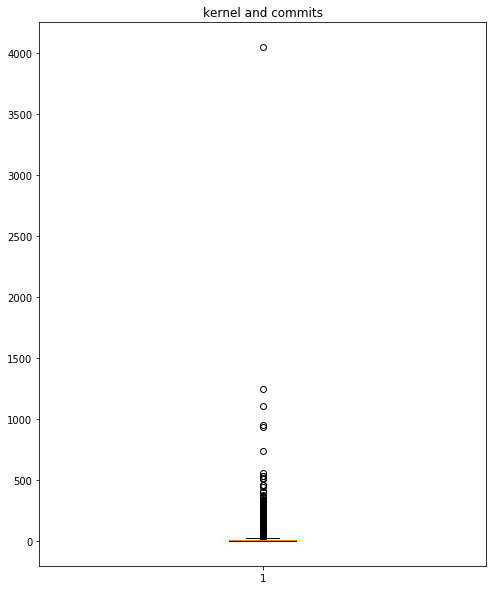

DescribeResult(nobs=24662, minmax=(0, 4046), mean=11.538845186927256, variance=1352.0013903049721, skewness=59.794613696634656, kurtosis=6016.409292757706)
median:  5.0


In [4]:
data_cluster = []
for index, row in kernel_stats.iterrows():
    data_cluster.append(int(row["versions"]))
load_plot_describe(data_cluster, 9, "kernel and commits")

# dataset

size
information about size. 
 count    1.972000e+03
mean     3.286749e+09
std      6.721750e+10
min      1.870000e+02
25%      6.603325e+04
50%      1.189732e+06
75%      2.584933e+07
max      2.610000e+12
Name: size, dtype: float64 


discussions
information about discussions. 
 count    1972.000000
mean        1.582657
std         4.286631
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        88.000000
Name: discussions, dtype: float64 


kernels
information about kernels. 
 count    1972.000000
mean       39.128296
std       157.453712
min         1.000000
25%         2.000000
50%         4.000000
75%        16.250000
max      3659.000000
Name: kernels, dtype: float64 


downloads
information about downloads. 
 count     1972.000000
mean      2051.220588
std       5672.133359
min          0.000000
25%         48.000000
50%        371.000000
75%       1611.500000
max      98617.000000
Name: downloads, dtype: float64 


views
information about

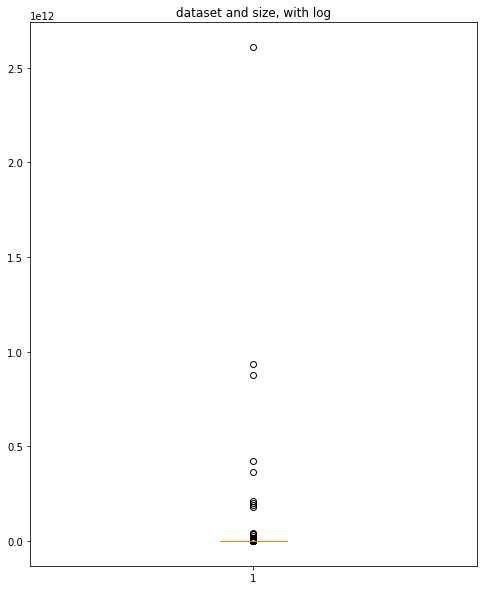

DescribeResult(nobs=1972, minmax=(187, 2610000000000), mean=3286748886.1602435, variance=4.518192798080131e+21, skewness=32.30997642560716, kurtosis=1179.5857058501972)
median:  1189732.5
960
937
48
9
18


In [5]:
# dataset_stats = pd.read_csv("C:\\Users\\xmk233\\PycharmProjects\\EECS6414\\process\\test_pipeline\\TEST_DATASET2\\stats\\dataset_stats.csv")

# for i in list(dataset_stats.columns.values):
#     if i == "dataset" or i == "author":
#         continue
#     print(i)
#     dataset_stats[i] = pd.to_numeric(dataset_stats[i])
#     print("information about {}. \n".format(i), dataset_stats[i].describe(), "\n\n")

file_name = "dataset_stats.csv"
path = "C:\\Users\\xmk233\\PycharmProjects\\EECS6414\\process\\test_pipeline\\TEST_DATASET2\\stats"
features_dont_want_to_see = ["dataset", "author"]
dataset_stats = describe_a_data_frame(join(path, file_name), features_dont_want_to_see)

data_cluster = []
for index, row in dataset_stats.iterrows():
    data_cluster.append(int(row["size"]))
load_plot_describe(data_cluster, 9, "dataset and size, with log")

sets = []
#sets.append([i for i in data_cluster if i <= 1024]) # 1k
sets.append([i for i in data_cluster if i <= 1048576]) # 1M
#sets.append([i for i in data_cluster if i > 1048576 and i <= 104857600])# 1M - 100M
sets.append([i for i in data_cluster if i > 1048576 and i <= 1073741824])#1M - 1G
sets.append([i for i in data_cluster if i > 1073741824 and i <= 5368709120])# 1G - 5G
sets.append([i for i in data_cluster if i > 5368709120 and i <= 10737418240])# 5G - 10G
sets.append([i for i in data_cluster if i > 10737418240]) # 10G

for i in sets:
    print(len(i))

# competition

size
information about size. 
 count    2.160000e+02
mean     2.662326e+09
std      1.066109e+10
min      0.000000e+00
25%      2.238479e+06
50%      3.449149e+07
75%      4.738207e+08
max      1.026039e+11
Name: size, dtype: float64 


discussion
information about discussion. 
 count     216.000000
mean      104.101852
std       137.093072
min         0.000000
25%        12.750000
50%        66.000000
75%       148.500000
max      1300.000000
Name: discussion, dtype: float64 


competitors
information about competitors. 
 count      216.000000
mean      1289.310185
std       1516.425838
min          0.000000
25%        193.750000
50%        764.500000
75%       1850.000000
max      10218.000000
Name: competitors, dtype: float64 




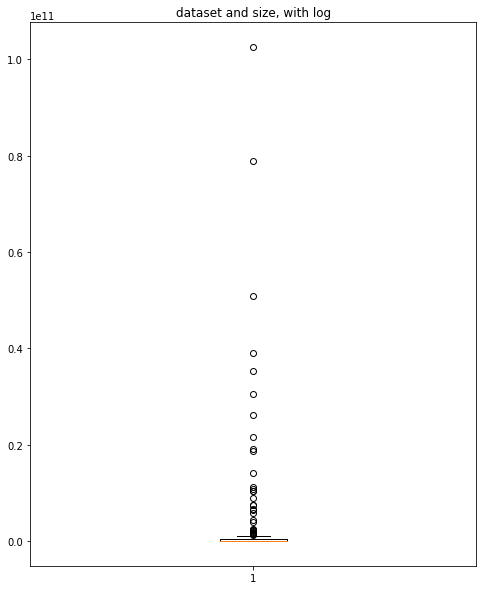

DescribeResult(nobs=216, minmax=(0, 102603903219), mean=2662326327.9259257, variance=1.1365890043150041e+20, skewness=6.490403576189753, kurtosis=48.7246619405204)
median:  34491487.0
45
136
14
9
12


In [6]:
# describe_a_data_frame("C:\\Users\\xmk233\\PycharmProjects\\EECS6414\\process\\test_pipeline\\TEST_DATASET2\\stats\\competition_stats.csv", 
#                      ["competition", "organization"])

file_name = "competition_stats.csv"
path = "C:\\Users\\xmk233\\PycharmProjects\\EECS6414\\process\\test_pipeline\\TEST_DATASET2\\stats"
features_dont_want_to_see = ["competition", "organization"]
competition_stats = describe_a_data_frame(join(path, file_name), features_dont_want_to_see)

data_cluster = []
for index, row in competition_stats.iterrows():
    data_cluster.append(int(row["size"]))
load_plot_describe(data_cluster, 9, "dataset and size, with log")

sets = []
#sets.append([i for i in data_cluster if i <= 1024]) # 1k
sets.append([i for i in data_cluster if i <= 1048576]) #1k - 1M
#sets.append([i for i in data_cluster if i > 1048576 and i <= 104857600])# 1M - 100M
sets.append([i for i in data_cluster if i > 1048576 and i <= 1073741824])#1M - 1G
sets.append([i for i in data_cluster if i > 1073741824 and i <= 5368709120])# 1G - 5G
sets.append([i for i in data_cluster if i > 5368709120 and i <= 10737418240])# 5G - 10G
sets.append([i for i in data_cluster if i > 10737418240]) # 10G

for i in sets:
    print(len(i))

# Author

competition
information about competition. 
 count    3240.000000
mean        4.698765
std        10.716101
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max       146.000000
Name: competition, dtype: float64 


cmp_tier
information about cmp_tier. 
 count    3240.000000
mean        1.813272
std         0.809032
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: cmp_tier, dtype: float64 


kernel
information about kernel. 
 count    3240.000000
mean        7.191667
std        22.707966
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       855.000000
Name: kernel, dtype: float64 


scpt_tier
information about scpt_tier. 
 count    3240.000000
mean        1.717901
std         0.637454
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: scpt_tier, dtype: float64 


discussion
information about d

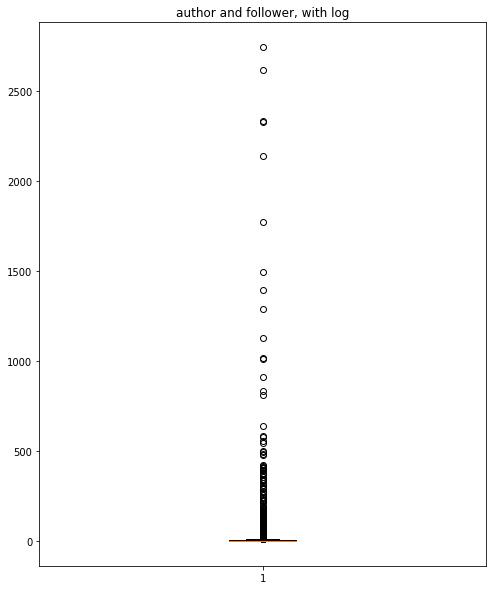

DescribeResult(nobs=3240, minmax=(0, 2743), mean=19.61111111111111, variance=15855.58505711639, skewness=14.348371532606476, kurtosis=247.3932593096659)
median:  1.0


In [10]:
# describe_a_data_frame("C:\\Users\\xmk233\\PycharmProjects\\EECS6414\\process\\test_pipeline\\TEST_DATASET2\\stats\\author_stats.csv", 
#                      ["author"])

file_name = "author_stats.csv"
path = "C:\\Users\\xmk233\\PycharmProjects\\EECS6414\\process\\test_pipeline\\TEST_DATASET2\\stats"
features_dont_want_to_see = ["author"]
author_stats = describe_a_data_frame(join(path, file_name), features_dont_want_to_see)

data_cluster = []
for index, row in author_stats.iterrows():
    data_cluster.append(int(row["follower"]))
load_plot_describe(data_cluster, 9, "author and follower, with log")

Combine box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1e5299866a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e529986f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e529986550>,
 'medians': [<matplotlib.lines.Line2D at 0x1e52999f7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e52999fc18>,
 'means': []}

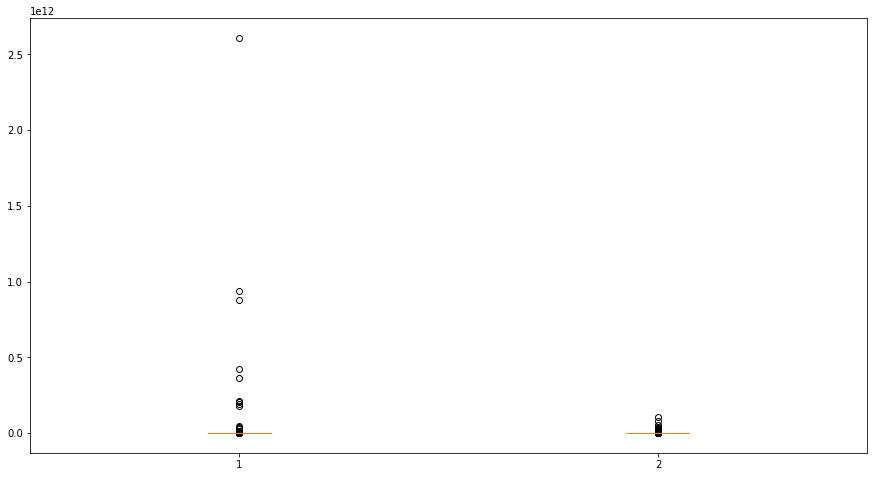

In [11]:
kernel_cluster = []
for index, row in kernel_stats.iterrows():
    kernel_cluster.append(int(row["versions"]))
#kernel_cluster = np.log([x+0.1 for x in kernel_cluster])

dataset_cluster = []
for index, row in dataset_stats.iterrows():
    dataset_cluster.append(int(row["size"]))
#dataset_cluster = np.log([x+0.1 for x in dataset_cluster])
    
competition_cluster = []
for index, row in competition_stats.iterrows():
    competition_cluster.append(int(row["size"]))
#competition_cluster = np.log([x+0.1 for x in competition_cluster])
    

author_cluster = []
for index, row in author_stats.iterrows():
    author_cluster.append(int(row["follower"]))
#author_cluster = np.log([x+0.1 for x in author_cluster])
    

data_to_plot = [dataset_cluster, competition_cluster]
fig1, ax1 = plt.subplots(figsize=(15, 8))
ax1.boxplot(data_to_plot)
# ax1.set_xticklabels(['# of versions per kernel', 
#                     'size of datasets', 
#                      'size of competitions', 
#                     '# of followers per author'])